In [24]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.neuronsimlib as tns
import mylibrary.nnlib as tnn

## Generate Datasets

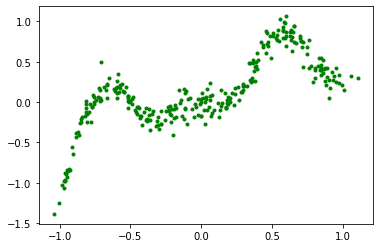

In [25]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Test Dynamic Network

In [26]:
net = tns.NeuralNetwork(1,1)

In [27]:
yout = net.forward(xx)
yout.shape

(300, 1)

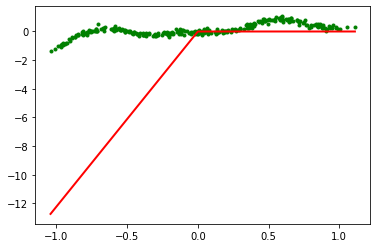

In [28]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, yout.reshape(-1), color='r', lw=2)

## Training Linear Regression with this network

In [29]:
%matplotlib tk
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.show()

for step in range(100000):
    
    y_out = net.forward(xx)
    loss = tnn.MseLoss.loss(y_out, yy)
    
    dy = tnn.MseLoss.del_loss(y_out, yy)
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax1.clear()
        ax1.scatter(x, y, marker='.', color='g', label='x,y')
        
        ax1.plot(x, y_out, c='r', lw=2, label='x,y_out')
        ax1.legend()
        
        ax2.clear()
        synapses = []
        for neuron in net.inners+net.motors:
            for i in range(len(neuron.synapses)):
                synapse = neuron.synapses[i]
                ax2.plot((neuron.position[0], synapse.position[0]),
                        (neuron.position[1], synapse.position[1]),
                        lw=neuron.weights[i]*neuron.idist[i],
                        marker='o',
                        color='b')
#         neurons_pos = []
#         for neuron in net.sensors+net.inners + net.motors:
#             neurons_pos.append(neuron.position)
#         neurons_pos = np.array(neurons_pos)
#         ax2.scatter(neurons_pos[:,0], neurons_pos[:,1])
        
        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 12.020084254812057

_______________________
epoch 100
Loss 0.04690943257304283

_______________________
epoch 200
Loss 0.03622461975070621

_______________________
epoch 300
Loss 0.03399122033444299

_______________________
epoch 400
Loss 0.03312720740622615

_______________________
epoch 500
Loss 0.03273040755197843

_______________________
epoch 600
Loss 0.03255770507216767

_______________________
epoch 700
Loss 0.032471072589803536

_______________________
epoch 800
Loss 0.032431456534416404

_______________________
epoch 900
Loss 0.032411632980588294

_______________________
epoch 1000
Loss 0.032398583812762505

_______________________
epoch 1100
Loss 0.032390413605907206

_______________________
epoch 1200
Loss 0.032385987500674535

_______________________
epoch 1300
Loss 0.03238343928238969

_______________________
epoch 1400
Loss 0.03238156332229091

_______________________
epoch 1500
Loss 0.032380070892608685

_______________________
epoch 

TclError: invalid command name "pyimage40"

In [30]:
(net.motors[0].del_outputs*net.sensors[0].outputs).std()

0.0

In [31]:
net.motors[0].weights

array([ 0.44798043,  0.32548278, -0.61859319, -0.68141706])

### Plot all neurons

In [32]:
neurons_pos = []
for neuron in net.sensors+net.inners + net.motors:
    neurons_pos.append(neuron.position)
neurons_pos = np.array(neurons_pos)
neurons_pos

array([[0.12514337, 0.49287175],
       [0.58453944, 0.46119022],
       [0.68474592, 0.53579908],
       [0.70266083, 0.45287931],
       [0.70536872, 0.52043209],
       [0.99754171, 0.49969358]])

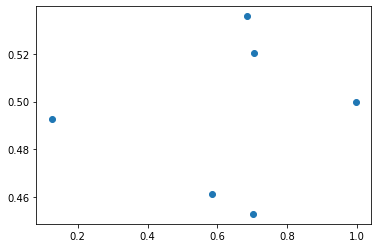

In [33]:
%matplotlib inline
plt.scatter(neurons_pos[:,0], neurons_pos[:,1])

In [34]:
# net.motors[0].del_position

In [35]:
net.motors[0].cpg

1

In [36]:
net.sensors[0].cpg

1